In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
import sys

# Import the LJSimulator class
from LJSimulator import LJSimulator

# Set simulation parameters
N = 64               # Number of particles
Lx = Ly = 10.0       # Initial box dimensions
temperature = 1.0    # Initial temperature
dt = 0.01            # Time step
equilibrium_steps = 0  # Steps to discard until equilibrium
total_time = 50.0    # Total simulation time (units)
phase_change_time = 10.0  # Time to resize box
anim_interval = 5    # Save position every N steps for animation

# Derived parameters
num_steps = int(total_time / dt)
phase_change_step = int(phase_change_time / dt)

# Create the simulation
sim = LJSimulator(N=N, Lx=Lx, Ly=Ly, temperature=temperature, dt=dt,
                  lattice_type='triangular', snapshot_interval=anim_interval)

print(f"Starting simulation with {N} particles for {num_steps} steps")
start_time = time.time()

# Step 1: Discard initial steps to reach equilibrium
print(f"Discarding first {equilibrium_steps} steps to reach equilibrium...")
for i in range(equilibrium_steps):
    sim.step()

# Step 2: Clear history after reaching equilibrium
sim.clear_history()

# Step 3: Main simulation loop
print(f"Running main simulation for {num_steps} steps...")
update_interval = max(1, num_steps // 20)  # Update every 5%

for i in range(num_steps):
    current_time = i * dt

    # Check if it's time to resize the box
    if i == phase_change_step:
        # Resize box and rescale positions
        sim.set_box_size(Lx / 2, Ly / 2)

        # Smoothly adjust particle speeds to control temperature
        sim.set_temperature(target_temperature=1.0)

        print(f"\nPhase change at time {current_time:.2f} (Step {i}): Resized box to Lx={Lx/2}, Ly={Ly/2}")

    sim.step()

    # Print progress updates
    if (i+1) % update_interval == 0 or i == num_steps-1:
        progress = (i+1) / num_steps * 100
        elapsed = time.time() - start_time
        eta = elapsed / (i+1) * (num_steps - i - 1)

        sys.stdout.write(f"\rProgress: {progress:.1f}% | Step: {i+1}/{num_steps} | ")
        sys.stdout.write(f"Time: {elapsed:.1f}s | ETA: {eta:.1f}s | ")
        sys.stdout.write(f"T: {sim.temperature:.3f} | P: {sim.pressure:.3f}")
        sys.stdout.flush()

print(f"\nSimulation completed in {time.time() - start_time:.2f} seconds")

Starting simulation with 64 particles for 5000 steps
Discarding first 0 steps to reach equilibrium...
Running main simulation for 5000 steps...
Progress: 20.0% | Step: 1000/5000 | Time: 4.3s | ETA: 17.1s | T: 0.936 | P: 0.992
Phase change at time 10.00 (Step 1000): Resized box to Lx=5.0, Ly=5.0
Progress: 100.0% | Step: 5000/5000 | Time: 20.8s | ETA: 0.0s | T: 22067936500211277271752899067587582269159648132071424.000 | P: 56493917440540873218511090822408845242794773535784960.000
Simulation completed in 20.83 seconds


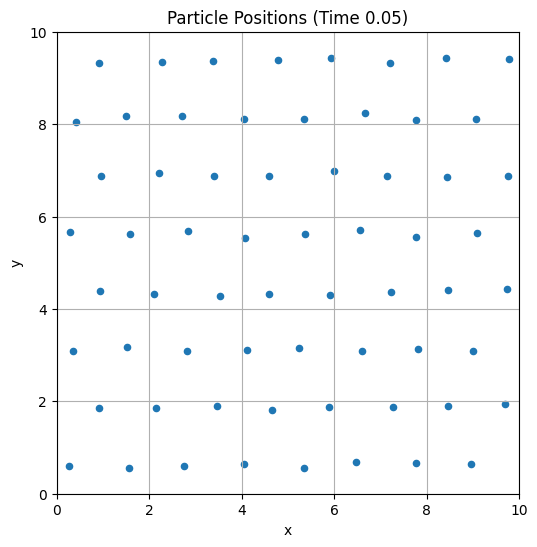

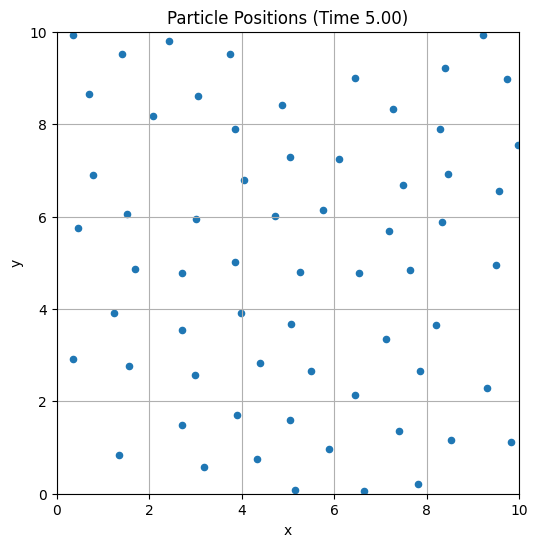

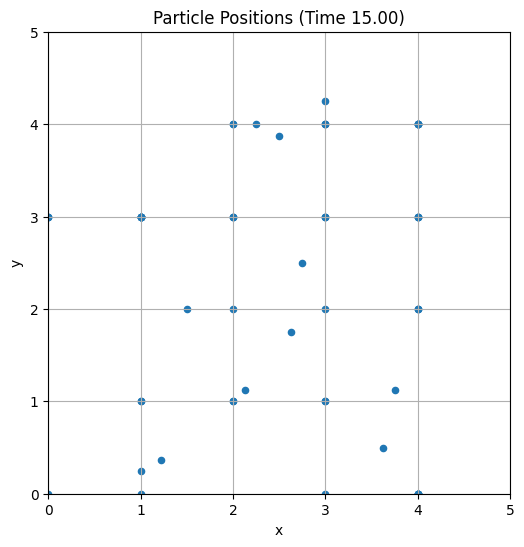

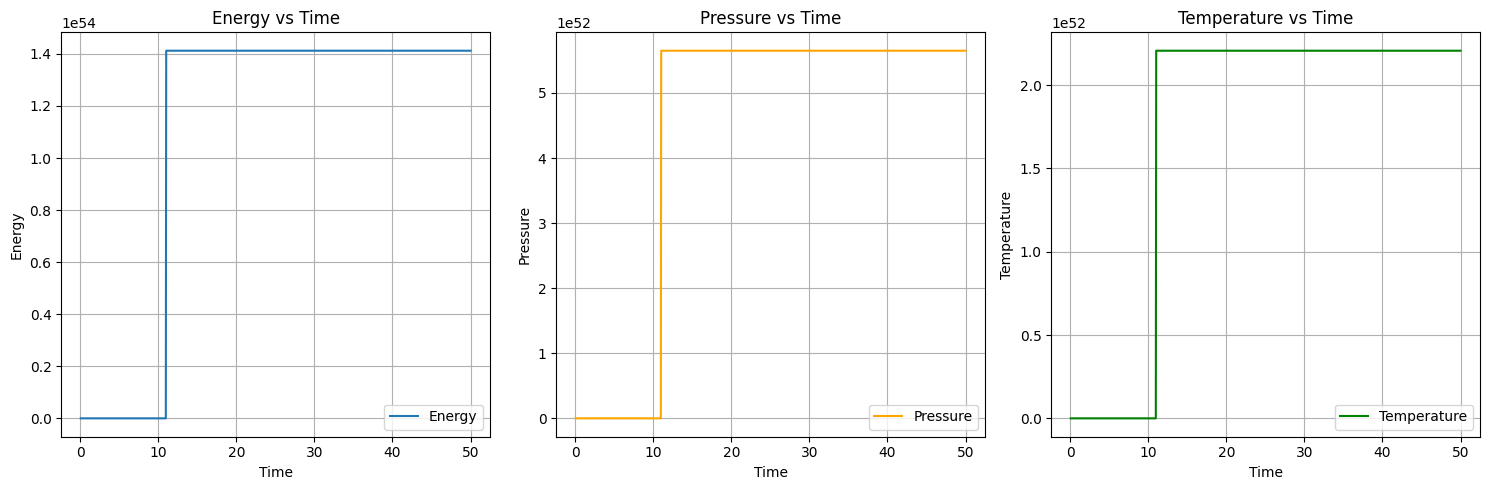

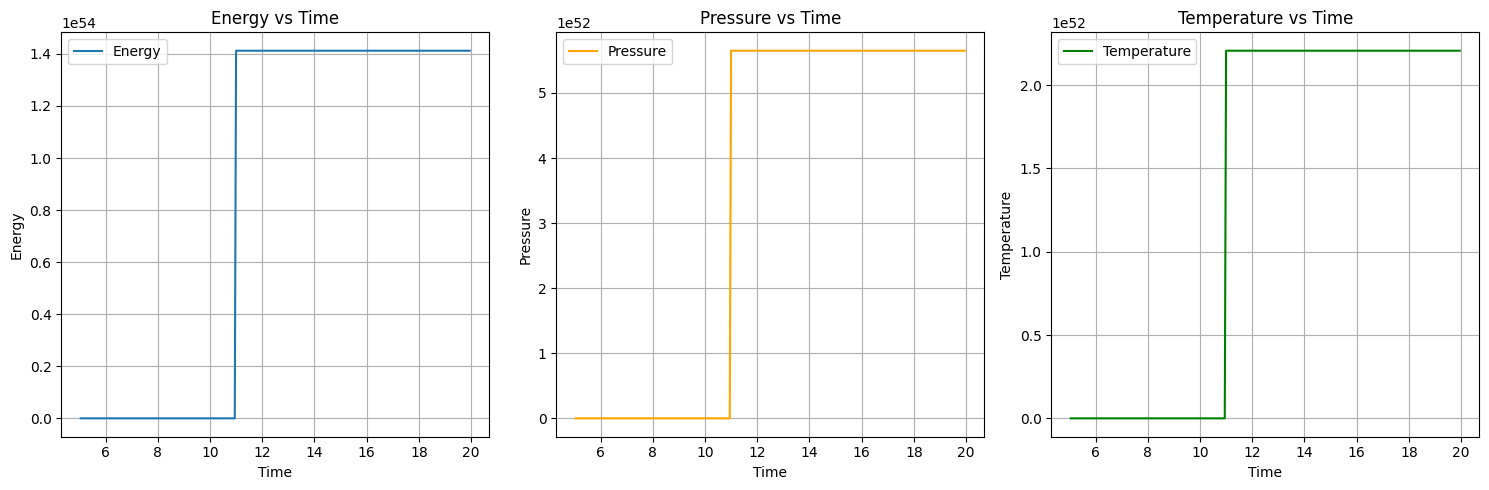

In [5]:
from LJVisualizer import LJVisualizer

# Create a visualizer
viz = LJVisualizer(sim)

viz.plot_positions(time=0.0)    # Initial positions

# Plot particle positions at time before box shrink
viz.plot_positions(time=5.0)    # Before box resize, should see x ∈ [0,10], y ∈ [0,10]

# Plot particle positions at time after box shrink
viz.plot_positions(time=15.0)   # After box resize, should see x ∈ [0,5], y ∈ [0,5]

# Plot the graphs for full simulation
viz.plot_metrics()

# Or zoom into phase transition period
viz.plot_metrics(start_time=5.0, end_time=20.0)

# Or animate the full simulation
# viz.animate_positions(interval=100)